<a href="https://colab.research.google.com/github/Itiel-z/Intro-to-AI-colab/blob/main/Assignment_5_Intro2AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment 5 - Itiel

# Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Task 1: Load the Titanic dataset

In [4]:
df = pd.read_csv('Titanic-Dataset.csv')

# Task 2: Inspect the data

In [5]:
# Display the first 5 rows of the dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# Display the last 5 rows of the dataset
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
# Display the data types of each column
df.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [9]:
# Display summary statistics of the numerical columns
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
# Display null values
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


# Task 3: Clean and preprocess the data

In [11]:
# Create a new categorical feature 'PclassCategory' from 'Pclass'
df['PclassCategory'] = df['Pclass'].map({1: 'First', 2: 'Second', 3: 'Third'})

In [12]:
# Create a new categorical feature 'CabinCategory' from 'Cabin'
df['CabinCategory'] = np.where(df['Cabin'].notnull(), df['Cabin'].astype(str).str[0], 'Unknown')

In [14]:
# Handle missing values in the 'Age' column (use mean age)
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [15]:
# Create a 'Family' feature by combining 'SibSp' and 'Parch'
df['Family'] = df['SibSp'] + df['Parch']

In [20]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,PclassCategory,CabinCategory,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Third,Unknown,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,First,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Third,Unknown,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,First,C,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Third,Unknown,0


# Task 4: Identify specific data points

In [17]:
# Find passengers with the highest fare
df.sort_values(by='Fare', ascending=False).head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,PclassCategory,CabinCategory,Family
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,First,B,1
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,First,Unknown,0
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,First,B,0
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S,First,C,5
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S,First,C,5


In [18]:
# Find passengers with the largest family size
df.sort_values(by='Family', ascending=False).head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,PclassCategory,CabinCategory,Family
846,847,0,3,"Sage, Mr. Douglas Bullen",male,29.699118,8,2,CA. 2343,69.55,NaN,S,Third,Unknown,10
324,325,0,3,"Sage, Mr. George John Jr",male,29.699118,8,2,CA. 2343,69.55,NaN,S,Third,Unknown,10
792,793,0,3,"Sage, Miss. Stella Anna",female,29.699118,8,2,CA. 2343,69.55,NaN,S,Third,Unknown,10
180,181,0,3,"Sage, Miss. Constance Gladys",female,29.699118,8,2,CA. 2343,69.55,NaN,S,Third,Unknown,10
159,160,0,3,"Sage, Master. Thomas Henry",male,29.699118,8,2,CA. 2343,69.55,NaN,S,Third,Unknown,10


# Task 5: Demonstrate Pandas Series and DataFrame functionalities

In [21]:
# Create a Pandas Series of passenger names
names_series = df['Name']
names_series.head()

,Name
0,"Braund, Mr. Owen Harris"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,"Heikkinen, Miss. Laina"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,"Allen, Mr. William Henry"


In [22]:
# Create a DataFrame of passenger names and ages
names_ages_df = df[['Name', 'Age']]
names_ages_df.head()

,Name,Age
0,"Braund, Mr. Owen Harris",22.0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0
2,"Heikkinen, Miss. Laina",26.0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0
4,"Allen, Mr. William Henry",35.0


In [23]:
# Slice the DataFrame to show only passengers older than 50
older_passengers = df[df['Age'] > 50]
older_passengers.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,PclassCategory,CabinCategory,Family
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,First,E,0
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,First,C,0
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S,Second,Unknown,0
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S,Second,Unknown,0
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C,First,B,1


# Task 6: Introduce multi-indexing

In [27]:
# Create a multi-index DataFrame grouped by 'Sex' and 'Pclass'
multi_index_df = df.groupby(['Sex', 'Pclass']).mean(numeric_only=True).round(2)
multi_index_df

PassengerId  Survived    Age  SibSp  Parch    Fare  Family
Sex    Pclass                                                            
female 1            469.21      0.97  34.14   0.55   0.46  106.13    1.01
       2            443.11      0.92  28.75   0.49   0.61   21.97    1.09
       3            399.73      0.50  24.07   0.90   0.80   16.12    1.69
male   1            455.73      0.37  39.29   0.31   0.28   67.23    0.59
       2            447.96      0.16  30.65   0.34   0.22   19.74    0.56
       3            455.52      0.14  27.37   0.50   0.22   12.66    0.72

# Task 7: Visualizations

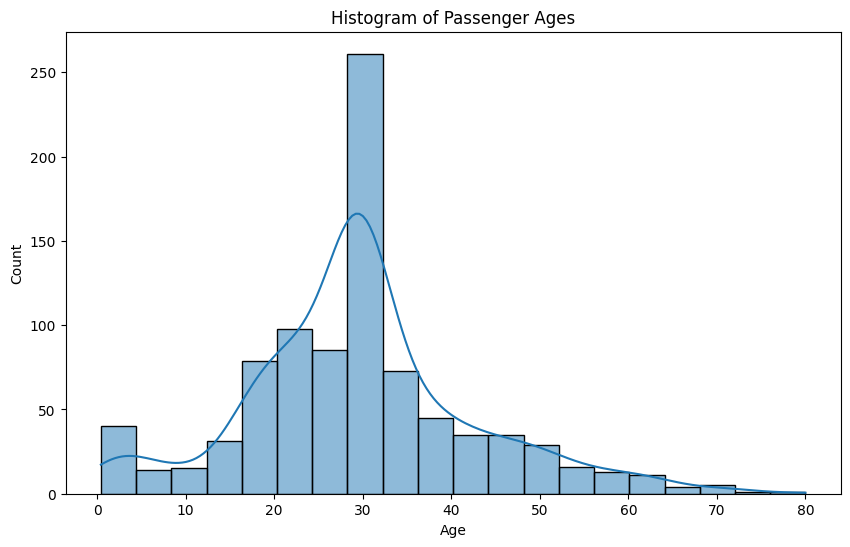

In [28]:
# Create a histogram of passenger ages
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Histogram of Passenger Ages')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

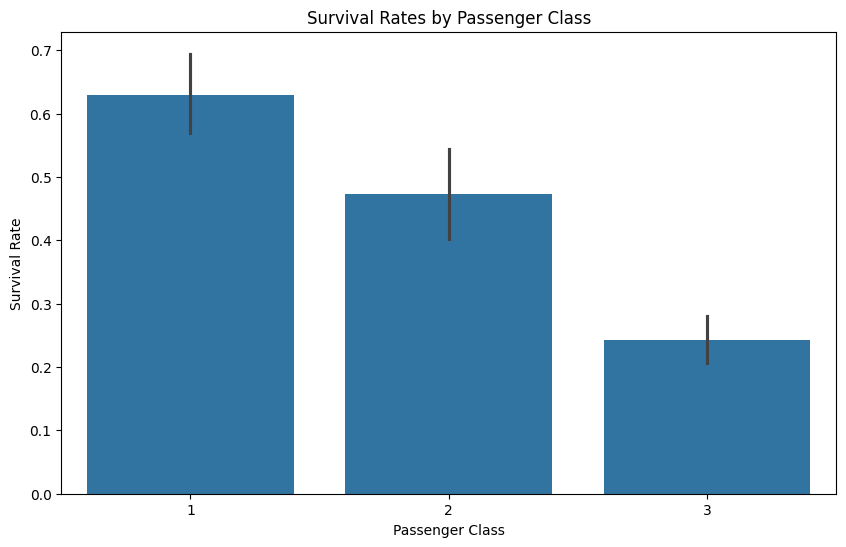

In [29]:
# Create a bar plot of survival rates by passenger class
plt.figure(figsize=(10, 6))
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rates by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

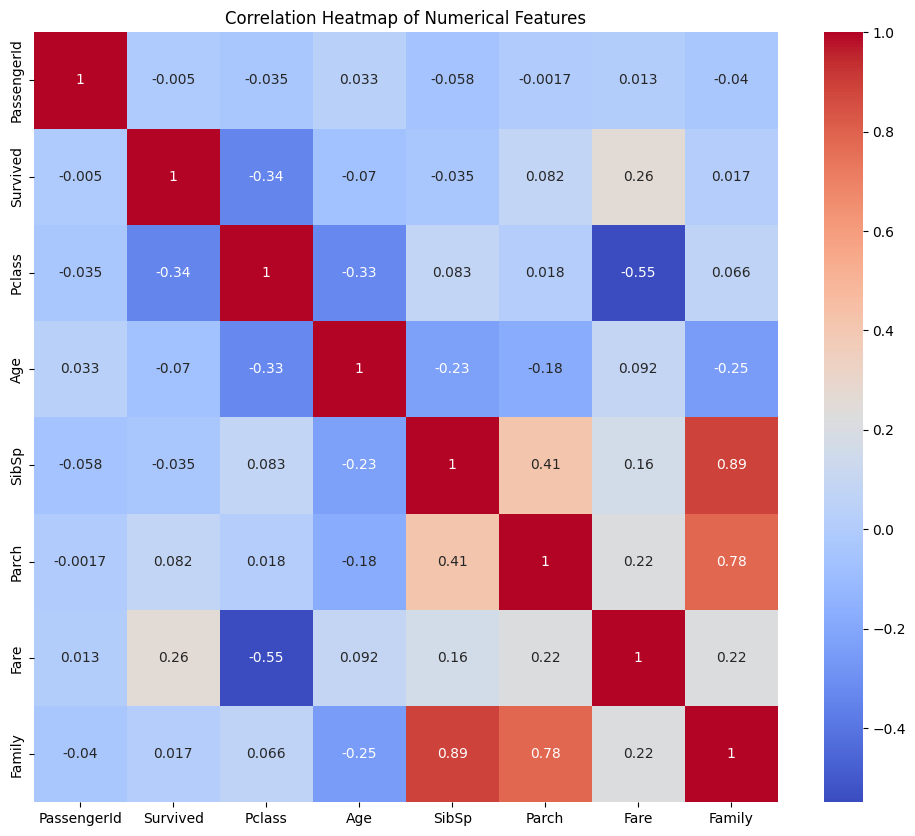

In [31]:
# Create a heatmap of correlation between numerical features
numeric_df = df.select_dtypes(include='number')
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

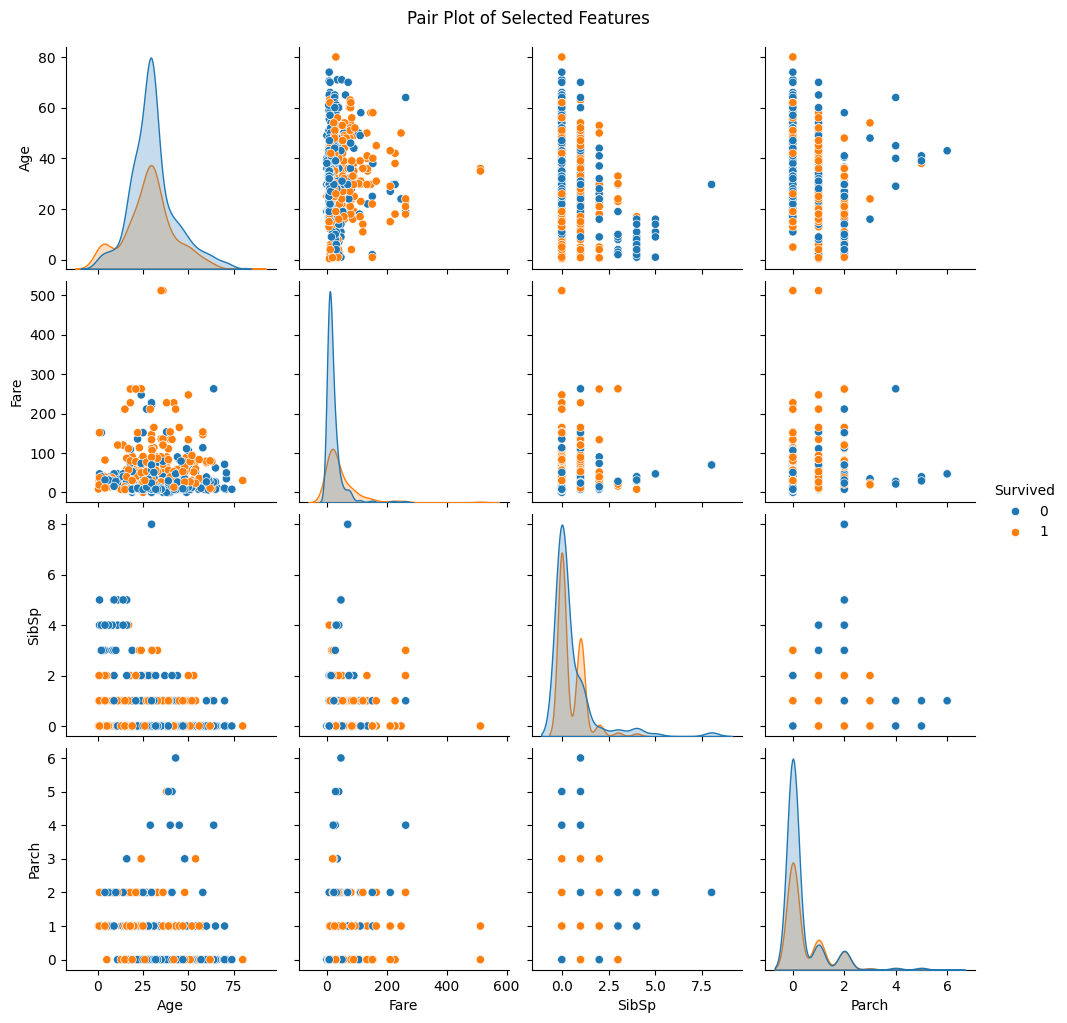

In [32]:
# Create a pair plot of 'Age', 'Fare', 'SibSp', and 'Parch', colored by 'Survived'
sns.pairplot(df[['Age', 'Fare', 'SibSp', 'Parch', 'Survived']], hue='Survived')
plt.suptitle('Pair Plot of Selected Features', y=1.02)
plt.show()

# Task 8: Analyze survival rates

In [37]:
# Calculate and display survival rates by sex
survival_by_sex = df.groupby('Sex')['Survived'].mean().round(4)*100
print(f'Survival rate in percentage: {survival_by_sex}')

Survival rate in percentage: Sex
female    74.20
male      18.89
Name: Survived, dtype: float64


In [38]:
# Calculate and display survival rates by passenger class
survival_by_class = df.groupby('Pclass')['Survived'].mean().round(4)*100
print(f'Survival rate in percentage: {survival_by_class}')

Survival rate in percentage: Pclass
1    62.96
2    47.28
3    24.24
Name: Survived, dtype: float64


# Task 9: Analyze age distribution

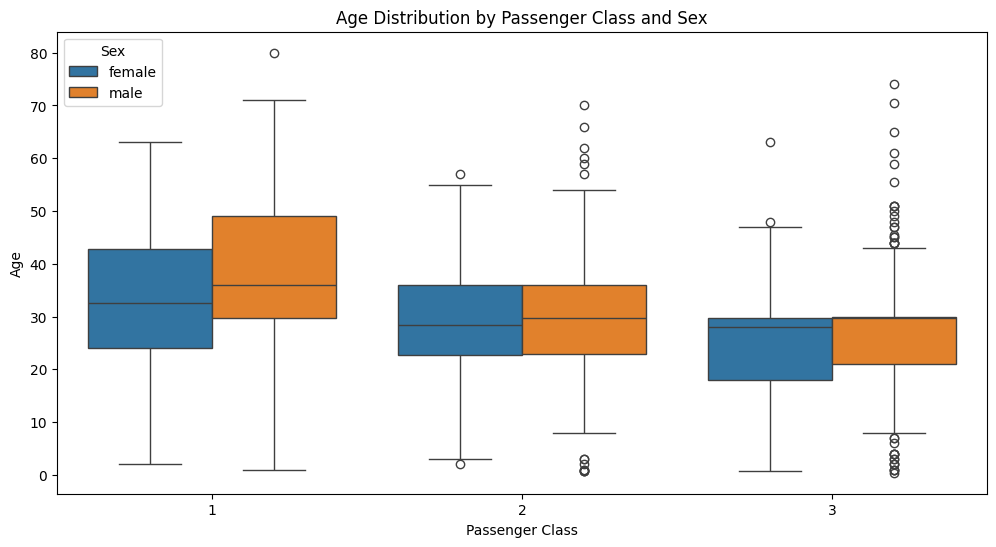

In [39]:
# Create a box plot of age distribution by passenger class and sex
plt.figure(figsize=(12, 6))
sns.boxplot(x='Pclass', y='Age', hue='Sex', data=df)
plt.title('Age Distribution by Passenger Class and Sex')
plt.xlabel('Passenger Class')
plt.ylabel('Age')
plt.show()

# Task 10: Analyze fare distribution

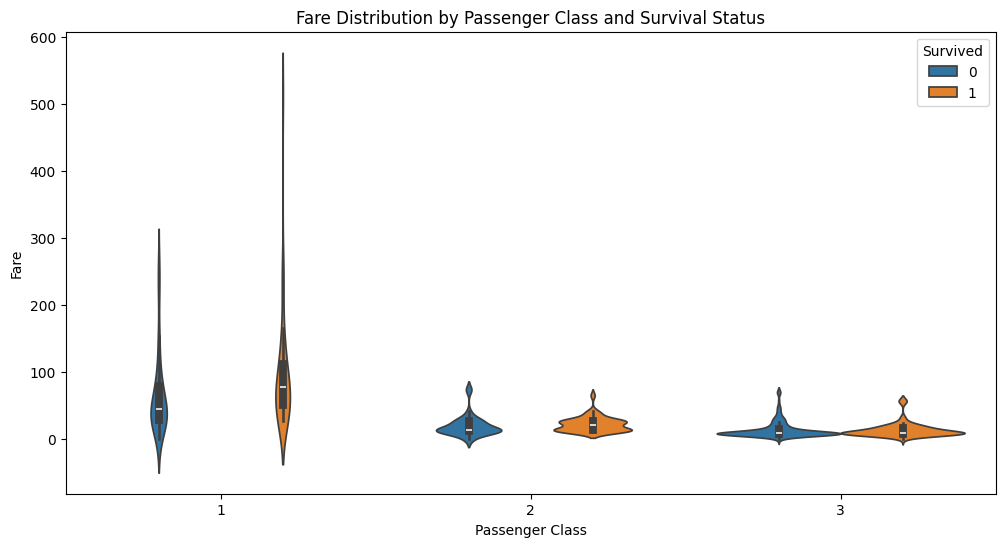

In [40]:
# Create a violin plot of fare distribution by passenger class and survival status
plt.figure(figsize=(12, 6))
sns.violinplot(x='Pclass', y='Fare', hue='Survived', data=df)
plt.title('Fare Distribution by Passenger Class and Survival Status')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.show()

In [41]:
print("EDA tasks completed.")

EDA tasks completed.
